In [77]:
import numpy as np
import pandas as pd
import os
import spacy
import en_core_web_sm
from spacy.lang.en import English
from spacy.lang.en.stop_words import STOP_WORDS
import string
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.feature_extraction import DictVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer,HashingVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from lightgbm import LGBMClassifier

In [2]:
# preprocessing the data file
#  read the data
df1 = pd.read_csv("drugsComTrain_raw.tsv",sep='\t')
df1.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [3]:
df2 = pd.read_csv("drugsComTest_raw.tsv",sep='\t')
df2.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,163740,Mirtazapine,Depression,"""I&#039;ve tried a few antidepressants over th...",10.0,"February 28, 2012",22
1,206473,Mesalamine,"Crohn's Disease, Maintenance","""My son has Crohn&#039;s disease and has done ...",8.0,"May 17, 2009",17
2,159672,Bactrim,Urinary Tract Infection,"""Quick reduction of symptoms""",9.0,"September 29, 2017",3
3,39293,Contrave,Weight Loss,"""Contrave combines drugs that were used for al...",9.0,"March 5, 2017",35
4,97768,Cyclafem 1 / 35,Birth Control,"""I have been on this birth control for one cyc...",9.0,"October 22, 2015",4


In [4]:
df = pd.concat([df1, df2])
df.head()

,Unnamed: 0,drugName,condition,review,rating,date,usefulCount
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [5]:
df.columns = ['ID','drug name','condition','review','rating','date','useful count']

In [6]:
df.head()

,ID,drug name,condition,review,rating,date,useful count
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            215063 non-null  int64  
 1   drug name     215063 non-null  object 
 2   condition     213869 non-null  object 
 3   review        215063 non-null  object 
 4   rating        215063 non-null  float64
 5   date          215063 non-null  object 
 6   useful count  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 13.1+ MB


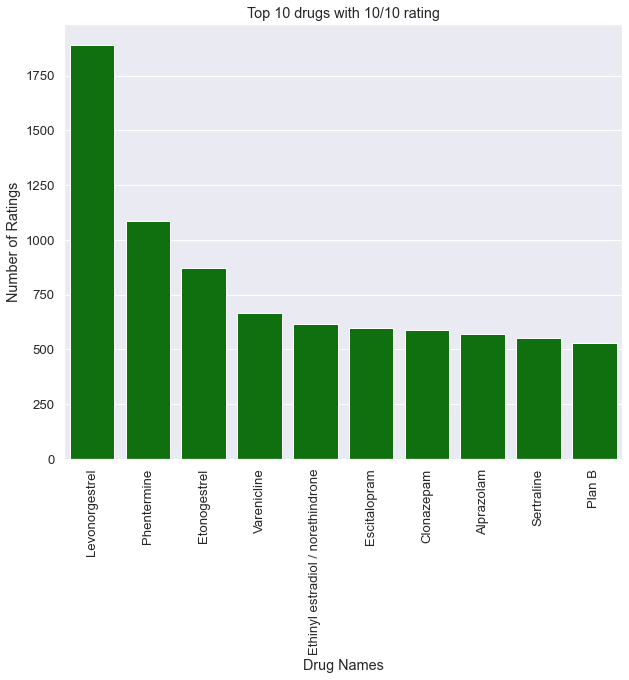

In [8]:
import seaborn as sns
#!pip install matplotlib
import matplotlib.pyplot as plt

# Setting the Parameter
sns.set(font_scale = 1.2, style = 'darkgrid')
plt.rcParams['figure.figsize'] = [10, 8]

rating = dict(df.loc[df.rating == 10, "drug name"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10],color='green')

sns_rating.set_title('Top 10 drugs with 10/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

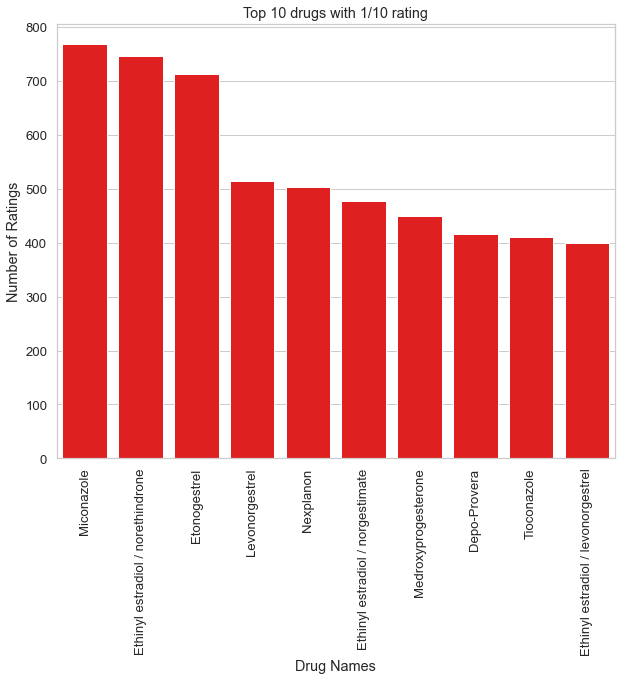

In [9]:
# Setting the Parameter
sns.set(font_scale = 1.2, style = 'whitegrid')
plt.rcParams['figure.figsize'] = [10, 8]

rating = dict(df.loc[df.rating == 1, "drug name"].value_counts())
drugname = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drugname[0:10], y = drug_rating[0:10], color = 'red')

sns_rating.set_title('Top 10 drugs with 1/10 rating')
sns_rating.set_ylabel("Number of Ratings")
sns_rating.set_xlabel("Drug Names")
plt.setp(sns_rating.get_xticklabels(), rotation=90);

C:\Users\renaik\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\renaik\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Rating')

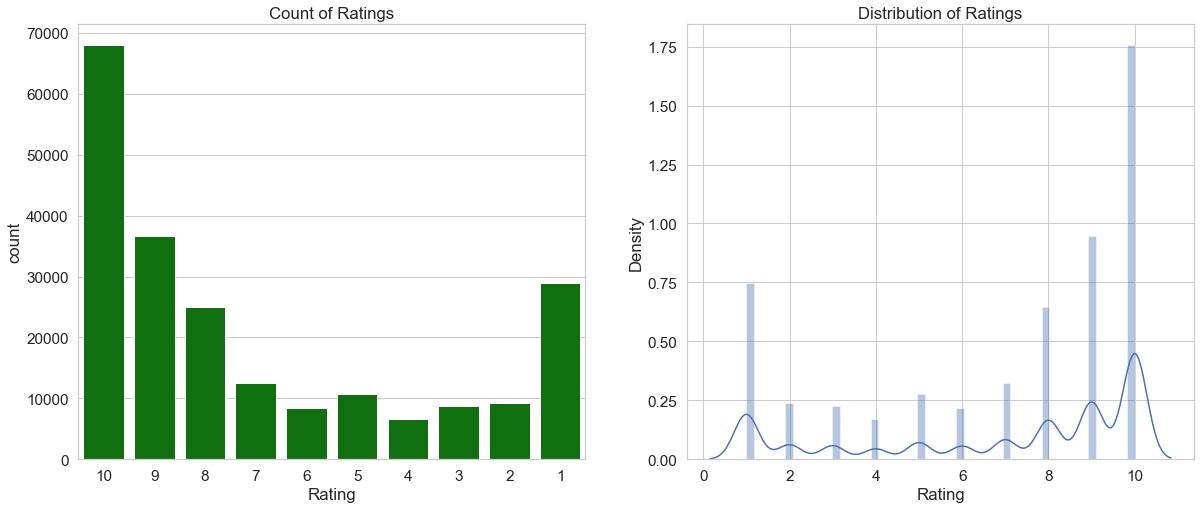

In [10]:
# A countplot of the ratings so we can see the distribution of the ratings
plt.rcParams['figure.figsize'] = [20,8]
sns.set(font_scale = 1.4, style = 'whitegrid')
fig, ax = plt.subplots(1, 2)

sns_1 = sns.countplot(df['rating'], color = 'green', order = list(range(10, 0, -1)), ax = ax[0])
sns_2 = sns.distplot(df['rating'], ax = ax[1])
sns_1.set_title('Count of Ratings')
sns_1.set_xlabel("Rating")

sns_2.set_title('Distribution of Ratings')
sns_2.set_xlabel("Rating")

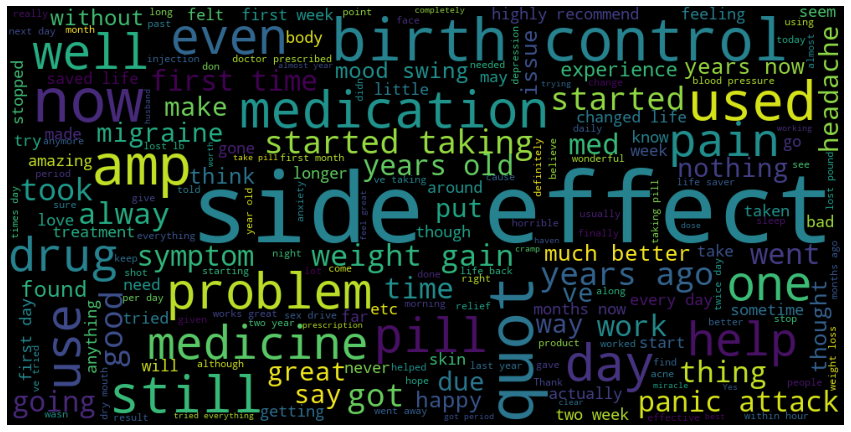

In [11]:
#!pip install wordcloud
from wordcloud import WordCloud# Word cloud of the reviews with rating equal to 10
df_rate_ten = df.loc[df.rating == 10, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

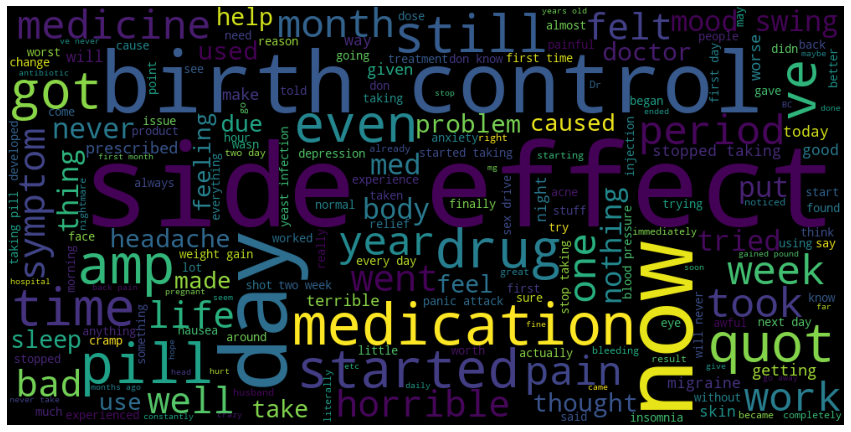

In [12]:
from wordcloud import WordCloud# Word cloud of the reviews with rating equal to 1
df_rate_ten = df.loc[df.rating == 1, 'review']
k = (' '.join(df_rate_ten))

wordcloud = WordCloud(width = 1000, height = 500).generate(k)
plt.figure(figsize=(15, 10))
plt.imshow(wordcloud)
plt.axis('off');

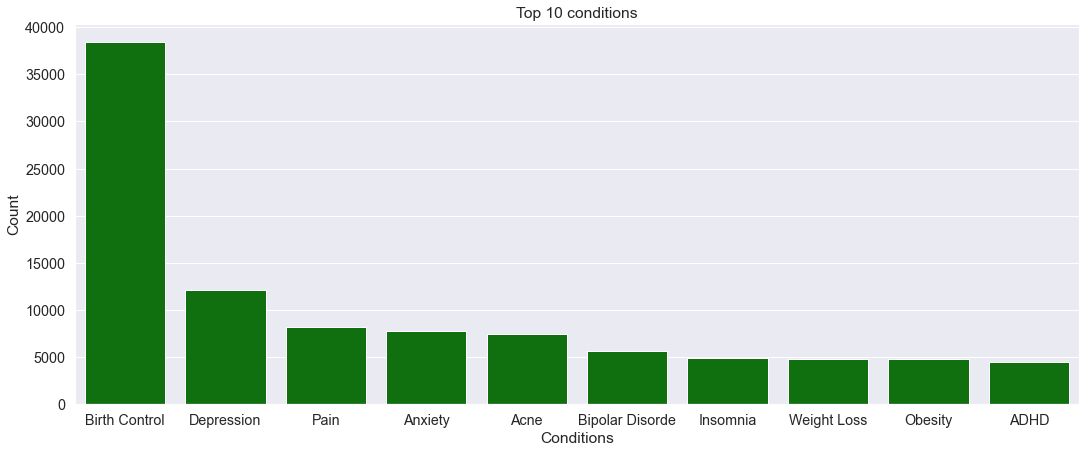

In [13]:
# This barplot show the top 10 conditions the people are suffering.
cond = dict(df['condition'].value_counts())
top_condition = list(cond.keys())[0:10]
values = list(cond.values())[0:10]
sns.set(style = 'darkgrid', font_scale = 1.3)
plt.rcParams['figure.figsize'] = [18, 7]

sns_ = sns.barplot(x = top_condition, y = values, color = 'green')
sns_.set_title("Top 10 conditions")
sns_.set_xlabel("Conditions")
sns_.set_ylabel("Count");

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 215063 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            215063 non-null  int64  
 1   drug name     215063 non-null  object 
 2   condition     213869 non-null  object 
 3   review        215063 non-null  object 
 4   rating        215063 non-null  float64
 5   date          215063 non-null  object 
 6   useful count  215063 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 17.2+ MB


In [15]:
print("Missing value (%):", 1200/df.shape[0] *100)

Missing value (%): 0.5579760349292998


In [16]:
df = df.dropna(axis=0)

In [17]:
df2 = df[df['useful count'] > 10]  

In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 133128 entries, 0 to 53765
Data columns (total 7 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   ID            133128 non-null  int64  
 1   drug name     133128 non-null  object 
 2   condition     133128 non-null  object 
 3   review        133128 non-null  object 
 4   rating        133128 non-null  float64
 5   date          133128 non-null  object 
 6   useful count  133128 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 8.1+ MB


In [19]:
df_condition = df2.groupby(['condition'])['drug name'].nunique().sort_values(ascending=False)
df_condition = pd.DataFrame(df_condition).reset_index()
df_condition.tail(20)

,condition,drug name
706,64</span> users found this comment helpful.,1
707,92</span> users found this comment helpful.,1
708,Gastritis/Duodenitis,1
709,Esophageal Variceal Hemorrhage Prophylaxis,1
710,98</span> users found this comment helpful.,1
711,Severe Mood Dysregulation,1
712,Short Stature,1
713,Short Stature for Age,1
714,Meningitis,1
715,"Skin Disinfection, Preoperative",1


In [20]:
df_condition_1 = df_condition[df_condition['drug name'] == 1].reset_index()

all_list = set(df.index)

# deleting them
condition_list = []
for i,j in enumerate(df['condition']):
    for c in list(df_condition_1['condition']):
        if j == c:
            condition_list.append(i)
            
new_idx = all_list.difference(set(condition_list))
df = df.iloc[list(new_idx)].reset_index()
del df['index']

In [21]:
df.shape

(160110, 7)

In [22]:
# removing the conditions with <span> in it.

all_list = set(df.index)
span_list = []
for i,j in enumerate(df['condition']):
    if "</span>" in str(j):
        span_list.append(i)
new_idx = all_list.difference(set(span_list))
df = df.iloc[list(new_idx)].reset_index()
del df['index']

In [23]:
import re
from bs4 import BeautifulSoup
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\renaik\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [24]:
# removing some stopwords from the list of stopwords as they are important for drug recommendation

stops = set(stopwords.words('english'))

not_stop = ["aren't","couldn't","didn't","doesn't","don't","hadn't","hasn't","haven't","isn't","mightn't",
            "mustn't","needn't","no","nor","not","shan't","shouldn't","wasn't","weren't","wouldn't"]
for i in not_stop:
    stops.remove(i)

In [25]:
stemmer = SnowballStemmer('english')

def review_to_words(raw_review):
    # 1. Delete HTML 
    review_text = BeautifulSoup(raw_review, 'html.parser').get_text()
    # 2. Make a space
    letters_only = re.sub('[^a-zA-Z]', ' ', review_text)
    # 3. lower letters
    words = letters_only.lower().split()
    # 5. Stopwords 
    meaningful_words = [w for w in words if not w in stops]
    # 6. Stemming
    stemming_words = [stemmer.stem(w) for w in meaningful_words]
    # 7. space join words
    return( ' '.join(stemming_words))

nlp = spacy.load('en_core_web_sm')
stop_words = spacy.lang.en.stop_words.STOP_WORDS


In [26]:
%time df['review_clean'] = df['review'].apply(review_to_words)
df.head()

Wall time: 3min 17s


,ID,drug name,condition,review,rating,date,useful count,review_clean
0,206461,Valsartan,Left Ventricular Dysfunction,"""It has no side effect, I take it in combinati...",9.0,"May 20, 2012",27,no side effect take combin bystol mg fish oil
1,95260,Guanfacine,ADHD,"""My son is halfway through his fourth week of ...",8.0,"April 27, 2010",192,son halfway fourth week intuniv becam concern ...
2,92703,Lybrel,Birth Control,"""I used to take another oral contraceptive, wh...",5.0,"December 14, 2009",17,use take anoth oral contracept pill cycl happi...
3,138000,Ortho Evra,Birth Control,"""This is my first time using any form of birth...",8.0,"November 3, 2015",10,first time use form birth control glad went pa...
4,35696,Buprenorphine / naloxone,Opiate Dependence,"""Suboxone has completely turned my life around...",9.0,"November 27, 2016",37,suboxon complet turn life around feel healthie...


In [27]:
bow_vector = CountVectorizer(analyzer = 'word',stop_words = stop_words, ngram_range=(1,3))
#  tf-idf vector
tfidf_vector = TfidfVectorizer(analyzer = 'word', 
                             tokenizer = None,
                             preprocessor = None, 
                             stop_words = stop_words, 
                             min_df = 2, 
                             ngram_range=(1,3),
                             max_features = 20000)

In [28]:
print(bow_vector)

CountVectorizer(ngram_range=(1, 3),
                stop_words={"'d", "'ll", "'m", "'re", "'s", "'ve", 'a', 'about',
                            'above', 'across', 'after', 'afterwards', 'again',
                            'against', 'all', 'almost', 'alone', 'along',
                            'already', 'also', 'although', 'always', 'am',
                            'among', 'amongst', 'amount', 'an', 'and',
                            'another', 'any', ...})


In [29]:
#Verification using Machine Learning Models
from sklearn.model_selection import train_test_split

x_train, x_test = train_test_split(df, test_size = 0.25, random_state = 0)

In [30]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline

cv = CountVectorizer(max_features = 20000, ngram_range = (1,3))
pipeline = Pipeline([('vect',cv)])

x_train_features = pipeline.fit_transform(x_train['review_clean'])
x_test_features = pipeline.fit_transform(x_test['review_clean'])

print("x_train_features :", x_train_features.shape)
print("x_test_features :", x_test_features.shape)
# let's make a new column review sentiment 

df.loc[(df['rating'] >= 5), 'Review_Sentiment'] = 1
df.loc[(df['rating'] < 5), 'Review_Sentiment'] = 0

df['Review_Sentiment'].value_counts()

x_train_features : (119424, 20000)
x_test_features : (39809, 20000)


1.0    119678
0.0     39555
Name: Review_Sentiment, dtype: int64

In [31]:
from sklearn.model_selection import GridSearchCV

In [86]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score
#from mlxtend.classifier import StackingClassifier
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import precision_score, confusion_matrix, recall_score
from sklearn.metrics import classification_report
# making our dependent variable

#features = df['review_clean'] # the features we want to analyze
features = pipeline.fit_transform(df['review_clean'])
labels = df['Review_Sentiment'] # the labels, we want to test against
X_train, X_test, y_train, y_test= train_test_split(features, labels, test_size=0.25, random_state=0)

In [33]:
clf2 = LogisticRegression(random_state=0,solver='lbfgs',max_iter=2000,multi_class='auto')

In [34]:
# Logistic Regression

x_train1 = x_train['review_clean']
pipe2 = Pipeline([('vectorizer', bow_vector),
                ('classifier', clf2)])
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

logreg_accuracy = accuracy_score(y_test, y_pred2)
print("Log Reg: ", logreg_accuracy )

C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Log Reg:  0.9146926574392725


In [35]:
#AUC
from sklearn.metrics import roc_curve, auc
y_score = pipe2.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [36]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred2,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.86      0.77      0.82      9787
     class 2       0.93      0.96      0.94     30022

    accuracy                           0.91     39809
   macro avg       0.90      0.87      0.88     39809
weighted avg       0.91      0.91      0.91     39809



In [37]:
#Confusion Matrix
cm2 = confusion_matrix(y_pred=y_pred2, y_true=y_test)
cm2

array([[ 7576,  2211],
       [ 1185, 28837]], dtype=int64)

In [38]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9495743361989566


In [39]:
clf7 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=0, max_iter=10, tol=None)

In [40]:
#SGD
pipe7 = Pipeline([('vectorizer', bow_vector),
               ('classifier', clf7)])
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred7)
print("SGD: ", sgd_accuracy)

SGD:  0.8704564294506267


In [41]:
#AUC
from sklearn.metrics import roc_curve, auc
y_score2 = pipe7.fit(X_train, y_train).decision_function(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
print('AUC: {}'.format(auc(fpr2, tpr2)))

AUC: 0.9252338908416856


In [42]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred7,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.84      0.58      0.69      9787
     class 2       0.88      0.96      0.92     30022

    accuracy                           0.87     39809
   macro avg       0.86      0.77      0.80     39809
weighted avg       0.87      0.87      0.86     39809



In [43]:
#Confusion Matrix
cm2 = confusion_matrix(y_pred=y_pred7, y_true=y_test)
cm2

array([[ 5702,  4085],
       [ 1072, 28950]], dtype=int64)

In [44]:
clf5 = MultinomialNB()

In [45]:
pipe5 = Pipeline([
                 ('vectorizer', bow_vector),
                 ('classifier', clf5)])
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)
print("MultinomialNB: ", accuracy_score(y_test, y_pred5))

MultinomialNB:  0.8773644150820167


In [46]:
#AUC
from sklearn.metrics import roc_curve, auc
y_score3 = pipe5.fit(X_train, y_train).predict_proba(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3[:,1])
print('AUC: {}'.format(auc(fpr3, tpr3)))

AUC: 0.8887266398020424


In [47]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred5,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.97      0.52      0.67      9787
     class 2       0.86      0.99      0.92     30022

    accuracy                           0.88     39809
   macro avg       0.92      0.76      0.80     39809
weighted avg       0.89      0.88      0.86     39809



In [48]:
#Confusion Matrix
cm3 = confusion_matrix(y_pred=y_pred5, y_true=y_test)
cm3

array([[ 5057,  4730],
       [  152, 29870]], dtype=int64)

In [49]:
# Logistic Regression

x_train1 = x_train['review_clean']
pipe2 = Pipeline([('vectorizer', tfidf_vector),
                ('classifier', clf2)])
pipe2.fit(X_train, y_train)
y_pred2 = pipe2.predict(X_test)

logreg_accuracy = accuracy_score(y_test, y_pred2)
print("Log Reg: ", logreg_accuracy )

C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:388: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


Log Reg:  0.855057901479565


In [50]:
#AUC
from sklearn.metrics import roc_curve, auc
y_score = pipe2.fit(X_train, y_train).decision_function(X_test)
fpr, tpr, thresholds = roc_curve(y_test, y_score)

In [51]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred2,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.78      0.58      0.66      9787
     class 2       0.87      0.95      0.91     30022

    accuracy                           0.86     39809
   macro avg       0.82      0.76      0.79     39809
weighted avg       0.85      0.86      0.85     39809



In [52]:
#Confusion Matrix
cm2 = confusion_matrix(y_pred=y_pred2, y_true=y_test)
cm2

array([[ 5659,  4128],
       [ 1642, 28380]], dtype=int64)

In [53]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.9028682259827348


In [54]:
clf7 = SGDClassifier(loss='hinge', penalty='l2', alpha=1e-3, random_state=0, max_iter=10, tol=None)

In [55]:
#SGD
pipe7 = Pipeline([('vectorizer', tfidf_vector),
               ('classifier', clf7)])
pipe7.fit(X_train, y_train)
y_pred7 = pipe7.predict(X_test)
sgd_accuracy = accuracy_score(y_test, y_pred7)
print("SGD: ", sgd_accuracy)

SGD:  0.7541510713657715


In [56]:
#AUC
from sklearn.metrics import roc_curve, auc
y_score2 = pipe7.fit(X_train, y_train).decision_function(X_test)
fpr2, tpr2, thresholds2 = roc_curve(y_test, y_score2)
print('AUC: {}'.format(auc(fpr2, tpr2)))

AUC: 0.8704104405381491


In [57]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred7,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.00      0.00      0.00      9787
     class 2       0.75      1.00      0.86     30022

    accuracy                           0.75     39809
   macro avg       0.38      0.50      0.43     39809
weighted avg       0.57      0.75      0.65     39809



C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [58]:
#Confusion Matrix
cm2 = confusion_matrix(y_pred=y_pred7, y_true=y_test)
cm2

array([[    0,  9787],
       [    0, 30022]], dtype=int64)

In [59]:
clf5 = MultinomialNB()

In [60]:
pipe5 = Pipeline([
                 ('vectorizer', tfidf_vector),
                 ('classifier', clf5)])
pipe5.fit(X_train, y_train)
y_pred5 = pipe5.predict(X_test)
print("MultinomialNB: ", accuracy_score(y_test, y_pred5))

MultinomialNB:  0.8220000502398955


In [61]:
#AUC
from sklearn.metrics import roc_curve, auc
y_score3 = pipe5.fit(X_train, y_train).predict_proba(X_test)
fpr3, tpr3, thresholds3 = roc_curve(y_test, y_score3[:,1])
print('AUC: {}'.format(auc(fpr3, tpr3)))

AUC: 0.8678315238693151


In [62]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred5,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.76      0.40      0.53      9787
     class 2       0.83      0.96      0.89     30022

    accuracy                           0.82     39809
   macro avg       0.80      0.68      0.71     39809
weighted avg       0.81      0.82      0.80     39809



In [63]:
#Confusion Matrix
cm2 = confusion_matrix(y_pred=y_pred2, y_true=y_test)
cm2

array([[ 5659,  4128],
       [ 1642, 28380]], dtype=int64)

In [65]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred5,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.76      0.40      0.53      9787
     class 2       0.83      0.96      0.89     30022

    accuracy                           0.82     39809
   macro avg       0.80      0.68      0.71     39809
weighted avg       0.81      0.82      0.80     39809



In [66]:
## Instantiate Random Forest Classifier
rf = RandomForestClassifier(n_estimators=10, max_depth=4, random_state=100, oob_score=True,class_weight="balanced_subsample")

In [67]:
pipe5 = Pipeline([
                 ('vectorizer', tfidf_vector),
                 ('classifier', rf)])

In [68]:
%%time
pipe5.fit(X_train, y_train)

Wall time: 23.6 s


C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(max_features=20000, min_df=2,
                                 ngram_range=(1, 3),
                                 stop_words={"'d", "'ll", "'m", "'re", "'s",
                                             "'ve", 'a', 'about', 'above',
                                             'across', 'after', 'afterwards',
                                             'again', 'against', 'all',
                                             'almost', 'alone', 'along',
                                             'already', 'also', 'although',
                                             'always', 'am', 'among', 'amongst',
                                             'amount', 'an', 'and', 'another',
                                             'any', ...})),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=4, n_estimators=10,
      

In [69]:
y_pred5 = pipe5.predict(X_test)
print("RandomForestClassifier: ", accuracy_score(y_test, y_pred5))

RandomForestClassifier:  0.5001130397648773


In [70]:
pipe5 = Pipeline([
                 ('vectorizer', bow_vector),
                 ('classifier', rf)])

In [71]:
%%time
pipe5.fit(X_train, y_train)

Wall time: 23.8 s


C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:541: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "
C:\Users\renaik\Anaconda3\lib\site-packages\sklearn\ensemble\_forest.py:545: RuntimeWarning: invalid value encountered in true_divide
  decision = (predictions[k] /


Pipeline(steps=[('vectorizer',
                 CountVectorizer(ngram_range=(1, 3),
                                 stop_words={"'d", "'ll", "'m", "'re", "'s",
                                             "'ve", 'a', 'about', 'above',
                                             'across', 'after', 'afterwards',
                                             'again', 'against', 'all',
                                             'almost', 'alone', 'along',
                                             'already', 'also', 'although',
                                             'always', 'am', 'among', 'amongst',
                                             'amount', 'an', 'and', 'another',
                                             'any', ...})),
                ('classifier',
                 RandomForestClassifier(class_weight='balanced_subsample',
                                        max_depth=4, n_estimators=10,
                                        oob_score=True, random_state=

In [72]:
y_pred5 = pipe5.predict(X_test)
print("RandomForestClassifier: ", accuracy_score(y_test, y_pred5))

RandomForestClassifier:  0.7382501444396996


In [73]:
print(confusion_matrix(y_test, y_pred5))

[[ 1860  7927]
 [ 2493 27529]]


In [75]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred5,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.43      0.19      0.26      9787
     class 2       0.78      0.92      0.84     30022

    accuracy                           0.74     39809
   macro avg       0.60      0.55      0.55     39809
weighted avg       0.69      0.74      0.70     39809



In [78]:
l_gbm= LGBMClassifier(
        n_estimators=10000,
        learning_rate=0.10,
        num_leaves=30,
        #colsample_bytree=.9,
        subsample=.9,
        max_depth=7,
        reg_alpha=.1,
        reg_lambda=.1,
        min_split_gain=.01,
        min_child_weight=2,
        silent=-1,
        verbose=-1,
        )

In [79]:
pipe5 = Pipeline([
                 ('vectorizer', bow_vector),
                 ('classifier', l_gbm)])

In [89]:
l_gbm.fit(X_train.astype(np.float32), y_train.astype(np.float32))
y_pred3 = l_gbm.predict(X_test.astype(np.float32))

l_gbm_accuracy = accuracy_score(y_test, y_pred3)
print("LightGBM: ", l_gbm_accuracy )

C:\Users\renaik\Anaconda3\lib\site-packages\lightgbm\sklearn.py:598: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via keyword arguments instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


LightGBM:  0.9168529729458162


In [90]:
print(confusion_matrix(y_test, y_pred3))

[[ 7647  2140]
 [ 1170 28852]]


In [91]:
#Classification Report
target_names = ["class 1", "class 2"]
print(classification_report(y_test, y_pred3,target_names=target_names))

              precision    recall  f1-score   support

     class 1       0.87      0.78      0.82      9787
     class 2       0.93      0.96      0.95     30022

    accuracy                           0.92     39809
   macro avg       0.90      0.87      0.88     39809
weighted avg       0.92      0.92      0.92     39809

